**Import Necesssary Modules**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10

In [9]:


# === Load CIFAR-10 ===
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.



In [10]:
# === Add Gaussian Noise ===
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


In [11]:
input_img = layers.Input(shape=(32, 32, 3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,651 (295.51 KB)

 Trainable params: 75,651 (295.51 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# === Train the Model ===
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))



Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 237s 599ms/step - loss: 0.0204 - val_loss: 0.0096
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 248s 563ms/step - loss: 0.0093 - val_loss: 0.0086
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 263s 567ms/step - loss: 0.0085 - val_loss: 0.0081
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 260s 561ms/step - loss: 0.0080 - val_loss: 0.0077
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 272s 586ms/step - loss: 0.0077 - val_loss: 0.0075
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 261s 585ms/step - loss: 0.0075 - val_loss: 0.0076
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 227s 579ms/step - loss: 0.0073 - val_loss: 0.0072
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 254s 558ms/step - loss: 0.0072 - val_loss: 0.0071
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 271s 582ms/step - loss: 0.0071 - val_loss: 0.0070
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 263s 584ms/step - loss: 0.0070 - val_loss: 0.0069


In [6]:
# === Predict on Noisy Test Set ===
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step


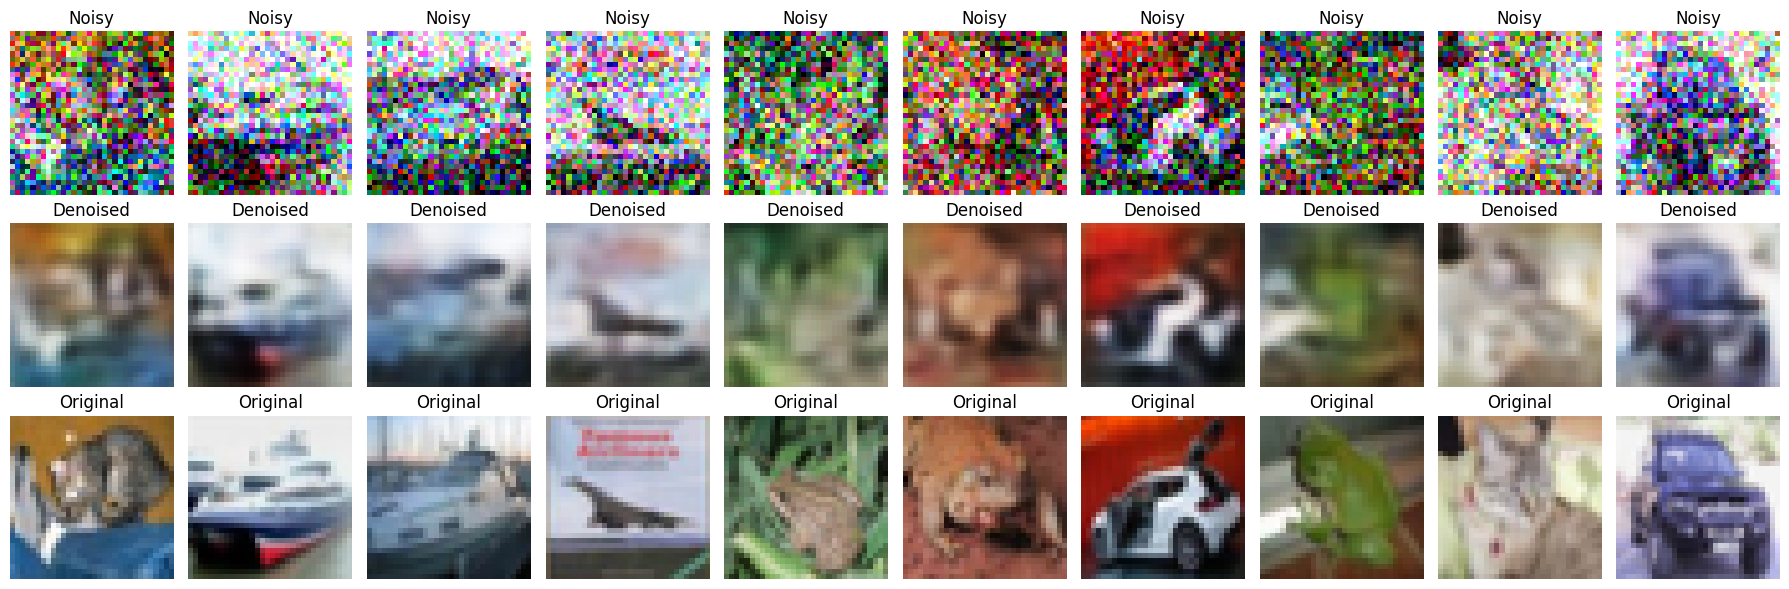

In [7]:
# === Visualize Original, Noisy, and Denoised Images ===
n = 10
plt.figure(figsize=(18, 6))
for i in range(n):
    # Noisy input
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Denoised")
    plt.axis("off")

    # Ground Truth
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis("off")

plt.tight_layout()
plt.show()